In [1]:
import os
import sys

sys.path.append('/home/julien/Bureau/Julien/02_DATA_PROJECTS/Maintenance')

import config

import pandas as pd
import numpy as np


import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

## Dimension_reduction  
#### pour ne garder que les features determinantes

In [7]:

df = pd.read_csv(os.path.join(config.DATA_DIR, 'maintenance_data_clean.csv'), index_col = 'Unnamed: 0')
df

,Air_Temperature,Process_temperature,Rotational_speed,Torque,Tool_Wear,Type_H,Type_L,Type_M,Failure_type_HDF,Failure_type_No_failure,Failure_type_OSF,Failure_type_PWF,Failure_type_TWF
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9996,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9997,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9998,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


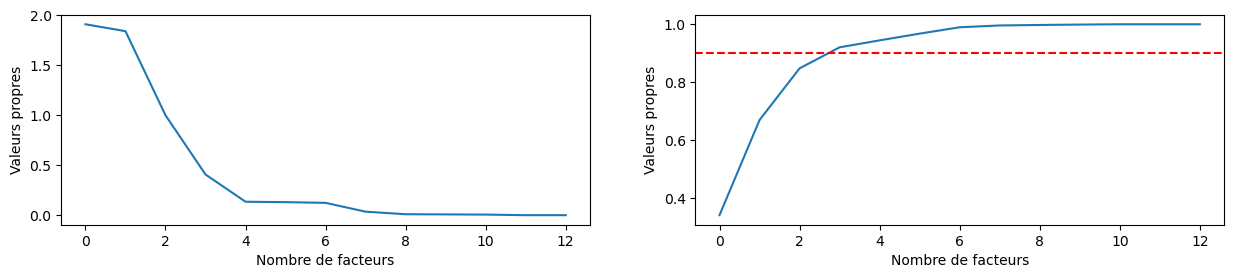

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)

plt.figure(figsize=(15, 6))

plt.subplot(2,2,1)
plt.plot(range(0,13), pca.explained_variance_)
plt.xlabel('Nombre de facteurs')
plt.ylabel('Valeurs propres')

plt.subplot(2,2,2)
plt.plot(range(0,13), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de facteurs')
plt.ylabel('Valeurs propres')
plt.axhline(y=0.90, color = 'r', linestyle = '--')


In [20]:
pca = PCA(n_components=0.9)
pca.fit(df)
print('number of usefull features', pca.n_components_)

number of usefull features 4


#### which feature is the most important

##